In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data and remove unnecessary header rows
cyto_assay = pd.read_csv('data/AID_1851_datatable_all.csv', skipinitialspace=True, header=[0,4])

In [3]:
# Drop the bottom level of the multi-index
cyto_assay.columns = cyto_assay.columns.droplevel(1)

In [4]:
cyto_assay.head()

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Inhibition Observed,Approved Drug,Collection,...,Activity at 11.43 uM,Activity at 25.56 uM,Activity at 57.14 uM,Activity at 0.00164 uM,Activity at 0.00366 uM,Activity at 0.00818 uM,Compound QC,Panel ID,Panel Name,Panel Target
0,1,842238,6602638.0,Inactive,NaN,NaN,NaN,True,Biodiverse,NaN,...,8.1486,NaN,-15.6281,NaN,NaN,NaN,QC'd by DPISMR,1,p450-cyp2c19,NP_000760.1
1,2,842238,6602638.0,Inconclusive,NaN,NaN,NaN,True,Biodiverse,NaN,...,-8.5062,NaN,-37.6308,NaN,NaN,NaN,QC'd by DPISMR,2,p450-cyp2d6,NP_001020332.1
2,3,842238,6602638.0,Inactive,NaN,NaN,NaN,True,Biodiverse,NaN,...,0.4027,NaN,-2.2935,NaN,-1.3363,NaN,QC'd by DPISMR,3,p450-cyp3a4,NP_059488.2
3,4,842238,6602638.0,Inactive,NaN,NaN,NaN,True,Biodiverse,NaN,...,-7.3920,NaN,-11.9048,NaN,NaN,NaN,QC'd by DPISMR,4,p450-cyp1a2,NP_000752.2
4,5,842238,6602638.0,Inconclusive,NaN,NaN,NaN,True,Biodiverse,NaN,...,-41.7035,NaN,-10.7694,NaN,NaN,NaN,QC'd by DPISMR,5,p450-cyp2c9,NP_000762.2


In [5]:
cyto_assay.isnull().sum()

PUBCHEM_RESULT_TAG               0
PUBCHEM_SID                      0
PUBCHEM_CID                    110
PUBCHEM_ACTIVITY_OUTCOME         0
PUBCHEM_ACTIVITY_SCORE       85715
PUBCHEM_ACTIVITY_URL         85715
PUBCHEM_ASSAYDATA_COMMENT    85715
Inhibition Observed              0
Approved Drug                    0
Collection                   80145
Analysis Comment             85715
Activity Score                   0
Potency                      45031
Curve_Description            42460
Fit_LogAC50                  42606
Fit_HillSlope                42606
Fit_R2                       42606
Fit_InfiniteActivity         42606
Fit_ZeroActivity             42606
Fit_CurveClass                   0
Excluded_Points              42606
Max_Response                     0
Activity at 0.0007 uM        58389
Activity at 0.00160 uM       73752
Activity at 0.00368 uM       20779
Activity at 0.00820 uM       73638
Activity at 0.018 uM          1556
Activity at 0.041 uM         71654
Activity at 0.091 uM

In [6]:
cyto_assay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85715 entries, 0 to 85714
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PUBCHEM_RESULT_TAG         85715 non-null  int64  
 1   PUBCHEM_SID                85715 non-null  int64  
 2   PUBCHEM_CID                85605 non-null  float64
 3   PUBCHEM_ACTIVITY_OUTCOME   85715 non-null  object 
 4   PUBCHEM_ACTIVITY_SCORE     0 non-null      float64
 5   PUBCHEM_ACTIVITY_URL       0 non-null      float64
 6   PUBCHEM_ASSAYDATA_COMMENT  0 non-null      float64
 7   Inhibition Observed        85715 non-null  bool   
 8   Approved Drug              85715 non-null  object 
 9   Collection                 5570 non-null   object 
 10  Analysis Comment           0 non-null      float64
 11  Activity Score             85715 non-null  int64  
 12  Potency                    40684 non-null  float64
 13  Curve_Description          43255 non-null  obj

In [7]:
cyto_assay['Inhibition Observed'].unique()

array([ True, False])

In [8]:
type(cyto_assay['Inhibition Observed'].items)

method

In [9]:
cyto_assay['Inhibition Observed'] = cyto_assay['Inhibition Observed'].map({True:1, False:0}).astype(int)

In [10]:
# pd.to_numeric(cyto_assay['Inhibition Observed'], errors='coerce')

In [11]:
cyto_assay['Inhibition Observed'].unique()

array([1, 0])

In [12]:
cyto_assay_corr = (cyto_assay.corr()[['Inhibition Observed']].sort_values(by='Inhibition Observed', ascending=False))
cyto_assay_corr

,Inhibition Observed
Inhibition Observed,1.000000e+00
Activity Score,2.915571e-01
Activity at 0.00366 uM,7.033316e-02
Activity at 0.00164 uM,6.621039e-02
PUBCHEM_SID,5.134221e-02
PUBCHEM_RESULT_TAG,3.583945e-02
Activity at 0.00368 uM,3.316173e-02
Activity at 0.0007 uM,2.891249e-02
Activity at 0.018 uM,2.753763e-02
Activity at 0.00820 uM,1.995518e-02


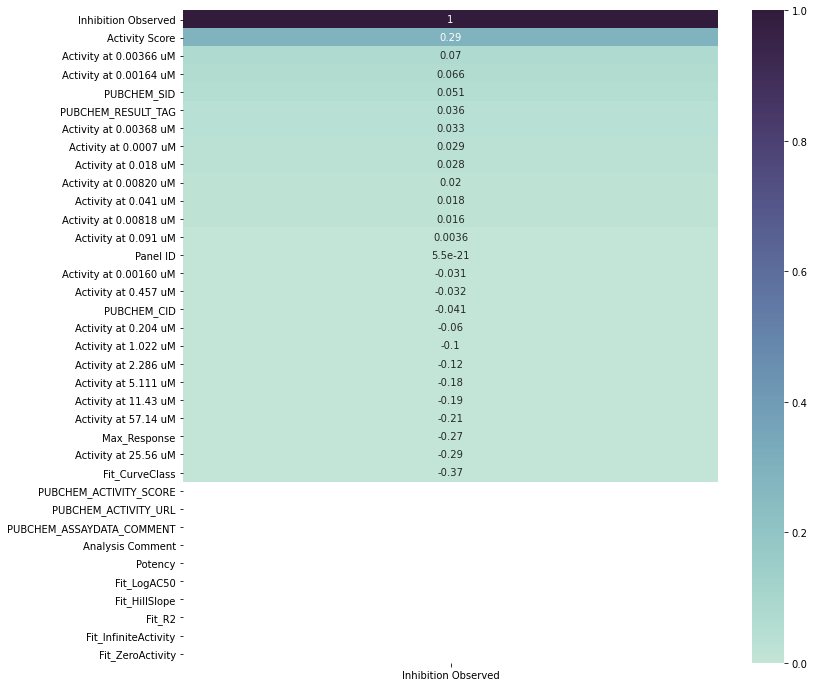

In [13]:
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
plt.figure(figsize = (12,12))
sns.heatmap(cyto_assay_corr, vmin=0, vmax=1, annot=True,cmap = cmap);
# plt.title('Correlation Heatmap', color='white')
# plt.xlabel('Inhibition Observed', color='white')
# plt.ylabel('Features', color='white')
# plt.xticks(color='white')
# plt.yticks(color='white')
# plt.savefig('datasets/correlation_heatmap_graph', transparent=True);

In [14]:
cyto_assay.isnull().sum()

PUBCHEM_RESULT_TAG               0
PUBCHEM_SID                      0
PUBCHEM_CID                    110
PUBCHEM_ACTIVITY_OUTCOME         0
PUBCHEM_ACTIVITY_SCORE       85715
PUBCHEM_ACTIVITY_URL         85715
PUBCHEM_ASSAYDATA_COMMENT    85715
Inhibition Observed              0
Approved Drug                    0
Collection                   80145
Analysis Comment             85715
Activity Score                   0
Potency                      45031
Curve_Description            42460
Fit_LogAC50                  42606
Fit_HillSlope                42606
Fit_R2                       42606
Fit_InfiniteActivity         42606
Fit_ZeroActivity             42606
Fit_CurveClass                   0
Excluded_Points              42606
Max_Response                     0
Activity at 0.0007 uM        58389
Activity at 0.00160 uM       73752
Activity at 0.00368 uM       20779
Activity at 0.00820 uM       73638
Activity at 0.018 uM          1556
Activity at 0.041 uM         71654
Activity at 0.091 uM

In [15]:
features = cyto_assay.select_dtypes(include=['float64','int64'])

X = features
y = 'Inhibition Observed'

In [16]:
cyto_assay['Approved Drug'].unique()

array(['Biodiverse', 'Exploratory'], dtype=object)

In [17]:
cyto_assay['Approved Drug'] = cyto_assay['Approved Drug'].replace({'Biodiverse':'1', 'Exploratory':'0'}).astype(float)

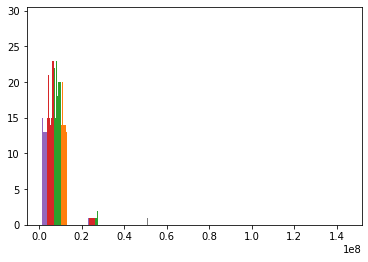

In [18]:
plt.hist(X);

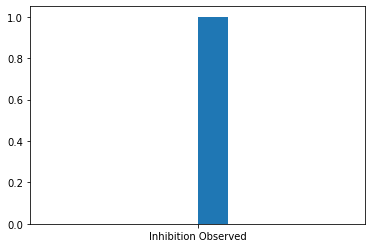

In [19]:
plt.hist(y);

In [20]:
cyto_assay['Compound QC'].unique()

array(["QC'd by DPISMR", "QC'd by Pharmacopeia", "QC'd by NCI",
       "QC'd by Prestwick", "QC'd by SigmaAldrich", "QC'd by Tocris",
       "QC'd by UPCMLD", "QC'd by ChemBridge", "QC'd by BUCMLD"],
      dtype=object)

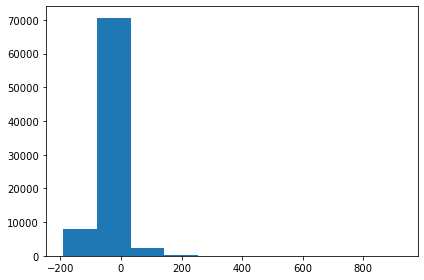

In [21]:
plt.hist(cyto_assay['Activity at 11.43 uM'])
plt.tight_layout();

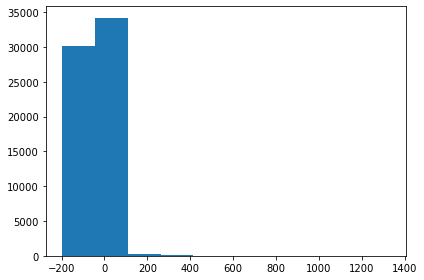

In [22]:
plt.hist(cyto_assay['Activity at 57.14 uM'])
plt.tight_layout();

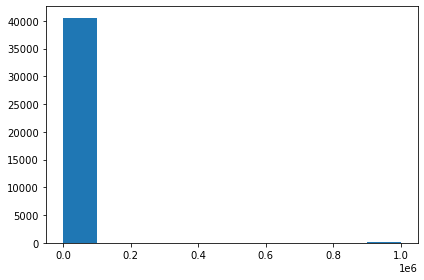

In [23]:
plt.hist(cyto_assay['Potency'])
plt.tight_layout();

In [24]:
substrate = pd.read_csv('data/MBTPsubDS1a.csv')

In [25]:
substrate.head()

,cmpd_id,gene_symbol,action_type,cmpd_name,smiles,protein_symbol
0,mbcd0001797,ABCC3,substrate,Fexofenadine,CC(C)(C(O)=O)C1=CC=C(C=C1)C(O)CCCN1CCC(CC1)C(O...,MRP3
1,mbcd0003012,ABCC3,substrate,Paracetamol glucuronide,CC(=O)NC1=CC=C(O[C@@H]2O[C@@H]([C@@H](O)[C@H](...,MRP3
2,mbcd0029566,SLC15A1,substrate,Glu-Ser-Met,CSCCC(NC(=O)C(CO)NC(=O)C(N)CCC(O)=O)C(O)=O,PEPT1
3,mbcd0003058,ABCB1,substrate,Prednisone,C[C@]12CC(=O)[C@H]3[C@@H](CCC4=CC(=O)C=C[C@]34...,MDR1
4,mbcd0001135,ABCC4,non-substrate,vincristine,CC[C@]1(O)C[C@@H]2C[N@](C1)CCC1=C(NC3=CC=CC=C1...,MRP4


In [26]:
cyp_subs = pd.concat([cyto_assay, substrate])
cyp_subs.head()

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Inhibition Observed,Approved Drug,Collection,...,Compound QC,Panel ID,Panel Name,Panel Target,cmpd_id,gene_symbol,action_type,cmpd_name,smiles,protein_symbol
0,1.0,842238.0,6602638.0,Inactive,NaN,NaN,NaN,1.0,1.0,NaN,...,QC'd by DPISMR,1.0,p450-cyp2c19,NP_000760.1,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,842238.0,6602638.0,Inconclusive,NaN,NaN,NaN,1.0,1.0,NaN,...,QC'd by DPISMR,2.0,p450-cyp2d6,NP_001020332.1,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,842238.0,6602638.0,Inactive,NaN,NaN,NaN,1.0,1.0,NaN,...,QC'd by DPISMR,3.0,p450-cyp3a4,NP_059488.2,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,842238.0,6602638.0,Inactive,NaN,NaN,NaN,1.0,1.0,NaN,...,QC'd by DPISMR,4.0,p450-cyp1a2,NP_000752.2,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,842238.0,6602638.0,Inconclusive,NaN,NaN,NaN,1.0,1.0,NaN,...,QC'd by DPISMR,5.0,p450-cyp2c9,NP_000762.2,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
cyp2c19 =  cyto_assay['Panel Name'] != 'p450-cyp2c19'